In [ ]:
'''
# Base Class
GeneralNeuron:
        |
        |----------Sensory Neuron: #Intermediate Class
        |                |-----------Photoreceptor #Leaf Class
        |                |-----------Mechanoreceptor #Leaf Class
        |
        |
        |----------Motor Neuron: #Intermediate Class
|                       |-----------Alpha Motor Neuron #Leaf Class
|                       |-----------Gamma Motor Neuron #Leaf Class
|
 '''

'\nGeneralNeuron:\n        |\n        |----------Sensory Neuron:\n        |                |-----------Photoreceptor\n        |                |-----------Mechanoreceptor\n        |\n        |\n        |----------Motor Neuron:\n|                       |-----------Alpha Motor Neuron\n|                       |-----------Gamma Motor Neuron\n|\n '

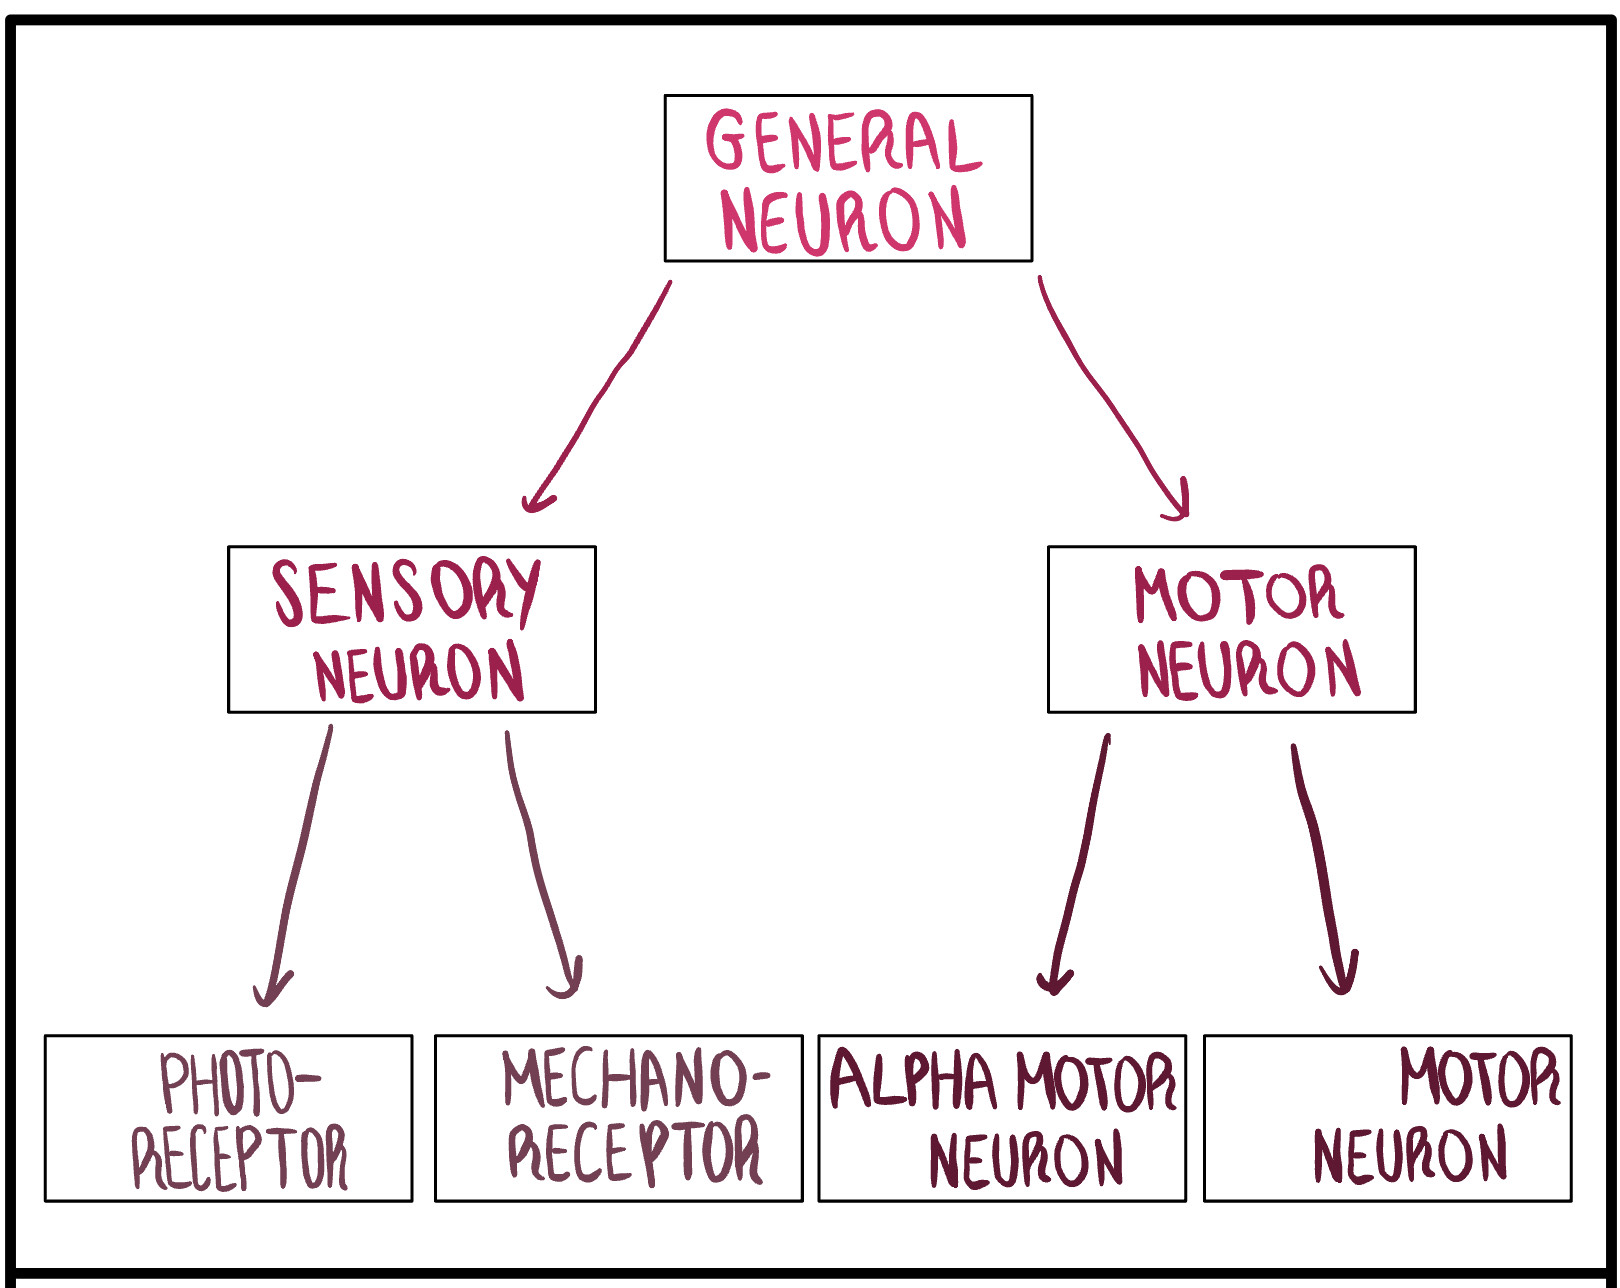

In [242]:

pip install numpy matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Base class
class GeneralNeuron:
    #The constructor for the base class 
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate
    # the unique method and functionality of the base class
    
    def activate(self, stimulus_strength):
        # Receives a stimulus and calculates a firing rate based on the
        # Strength of that stimulus.
        pass

#intermediate class 
class SensoryNeuron(GeneralNeuron):
    # Constructor that calls it's super class's constructor and also gets a receptor type and initalizes it. 
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type
    # the unique method and functionality 
    
    def sense_stimulus(self, stimulus):
      strength = stimulus.strength
      # Processes the specific stimulus it is sensitive to and
      # activates the neuron based on the strength or type of that stimulus.
      self.activate(strength)

class MotorNeuron(GeneralNeuron):
    # Constructor that calls it's super class's constructor and also gets a target muscle and initalizes it.
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle
    
    def control_muscle(self):
        # Triggers a response in the target muscle based on the neuron’s activation level.
        # Sends the firing rate as an argument to the target muscle. 
        pass
        


# Leaf classes
class Photoreceptor(SensoryNeuron):
    # Constructor that calls it's super class's constructor with the receptor type as light.
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")

    # Overriding the intermediate class' function.
    def sense_stimulus(self, light_intensity):
        self.activate(stimulus_strength= light_intensity.strength)
        # Receives light intensity as input and activates according to light levels.
        # Calls the Activate function to uniquely respond to the light intensity level. 
        # Exhibits a behaviour specific to light detection, such as increasing firing rate with higher light intensity.
        pass


class Mechanoreceptor(SensoryNeuron):
    # Constructor that calls it's super class's constructor with the receptor type as pressure.
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")

    # Overriding the intermediate class' function.
    def sense_stimulus(self, pressure_intensity):
        self.activate(stimulus_strength= pressure_intensity.strength)
        # Receives pressure as input and activates in response to the strength of the applied pressure.
        # Calls the Activate function to uniquely respond to the pressure level 
        # Produces a response based on the pressure level, potentially changing firing rate or triggering other effects.
        pass

class AlphaMotorNeuron(MotorNeuron):
    # Constructor that calls it's super class's constructor with the receptor type as skeletal muscle.
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    # Overriding the intermediate class' function.
    def control_muscle(self, activation_level):
        #Initiates muscle contraction or movement in response to its activation level.
        self.target_muscle.move(activation_level)
        

class GammaMotorNeuron(MotorNeuron):
    # Constructor that calls it's super class's constructor with the receptor type as muscle spindle.
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    # Overriding the intermediate class' function.
    def control_muscle(self, activation_level):
        # Adjusts muscle spindle tension in response to activation, affecting muscle tone.
         self.target_muscle.move(activation_level)

        


In [244]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [332]:
import numpy as np
import matplotlib.pyplot as plt

def sin_sample(signal):
    # Compute the first derivative
    derivative = np.diff(signal)
    # Find indices where the derivative changes sign
    maxima_indices = np.where((derivative[:-1] > 0) & (derivative[1:] <= 0))[0] + 1
    minima_indices = np.where((derivative[:-1] < 0) & (derivative[1:] >= 0))[0] + 1

    #save every 5th point to reduce the signal
    short_signal = np.linspace(0,len(signal)-1, len(signal)//5, dtype= int)
  
    #savind the indices of all of the critical points 
    critical_points = np.unique(np.concatenate((maxima_indices, minima_indices)))  

    #saving every 5th element plus the minima and maxima points, making sure every point in the graph is 
    # saved exactly once using the unique function. 
    all_indices = np.unique(np.concatenate((short_signal, critical_points)))  

    #returning the new array 
    return signal[all_indices], all_indices, signal[critical_points], critical_points


Downsized Signal: 28
Original Signal: 100


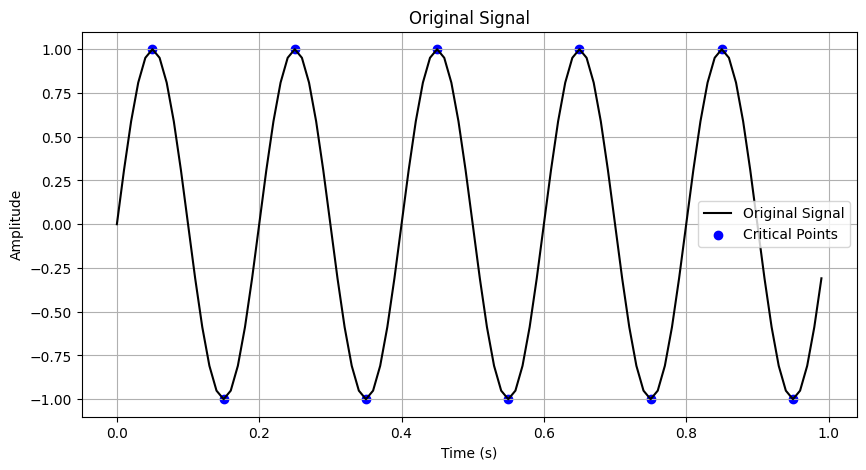

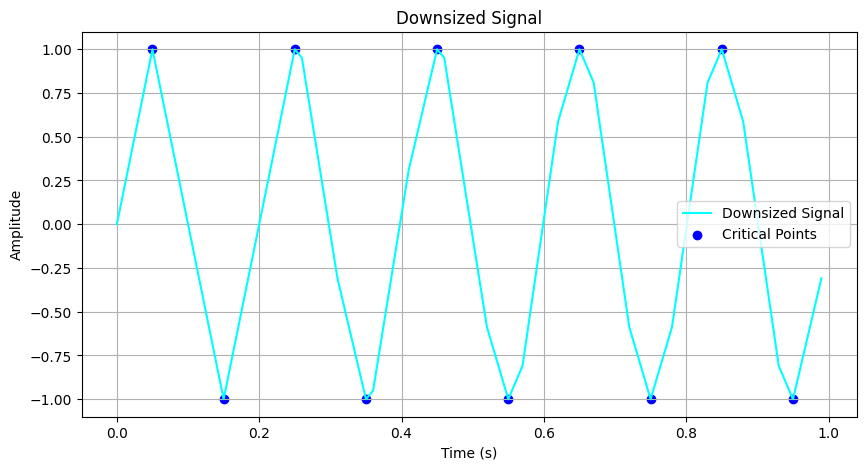

In [333]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 5Hz sinusoidal signal sampled every 0.01 seconds
# Time array for 1 second, sampled every 0.01 seconds (100 points total)
t = np.arange(0, 1.0, 0.01)  
# The 5Hz sinusoidal signal
signal = np.sin(2 * np.pi * 5 * t) 

# Call the function to downsize the signal while keeping all of the critical points.
downsized_signal, indices, critical, critical_indices  = sin_sample(signal)

# Print the lengths of the original and downsized signals to compare their sizes.
# Length of the reduced signal
print("Downsized Signal:", len(downsized_signal))
# Length of the original full signal
print("Original Signal:", len(signal))

# Plot the original signal
plt.figure(figsize=(10, 5))
# Plot the original signal in black, sending the plot function the time samples from above as the X axis and the signal
# As the Y axis. 
plt.plot(t, signal, label='Original Signal', color='black')
 # Highlight critical points in blue
plt.scatter(t[critical_indices], critical, color='blue', label='Critical Points')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# Add legend to the plot, so it will show the different things in the graph summarized 
plt.legend()
plt.grid(True)
plt.show()

# Plot the downsized signal
plt.figure(figsize=(10, 5))
# Sending the plot function the time, only in the sampled indexes as the X axis, and the downsized signal 
# in the Y axis so it will show us the sharper graph (the graph is sharper since we sampled it in less points so it
# is not as flowing as the original signal).
plt.plot(t[indices], downsized_signal, color='cyan', label='Downsized Signal')
# Highlight critical points.
plt.scatter(t[critical_indices], critical, color='blue', label='Critical Points')
plt.title('Downsized Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [247]:
!pip install pandas 

Defaulting to user installation because normal site-packages is not writeable


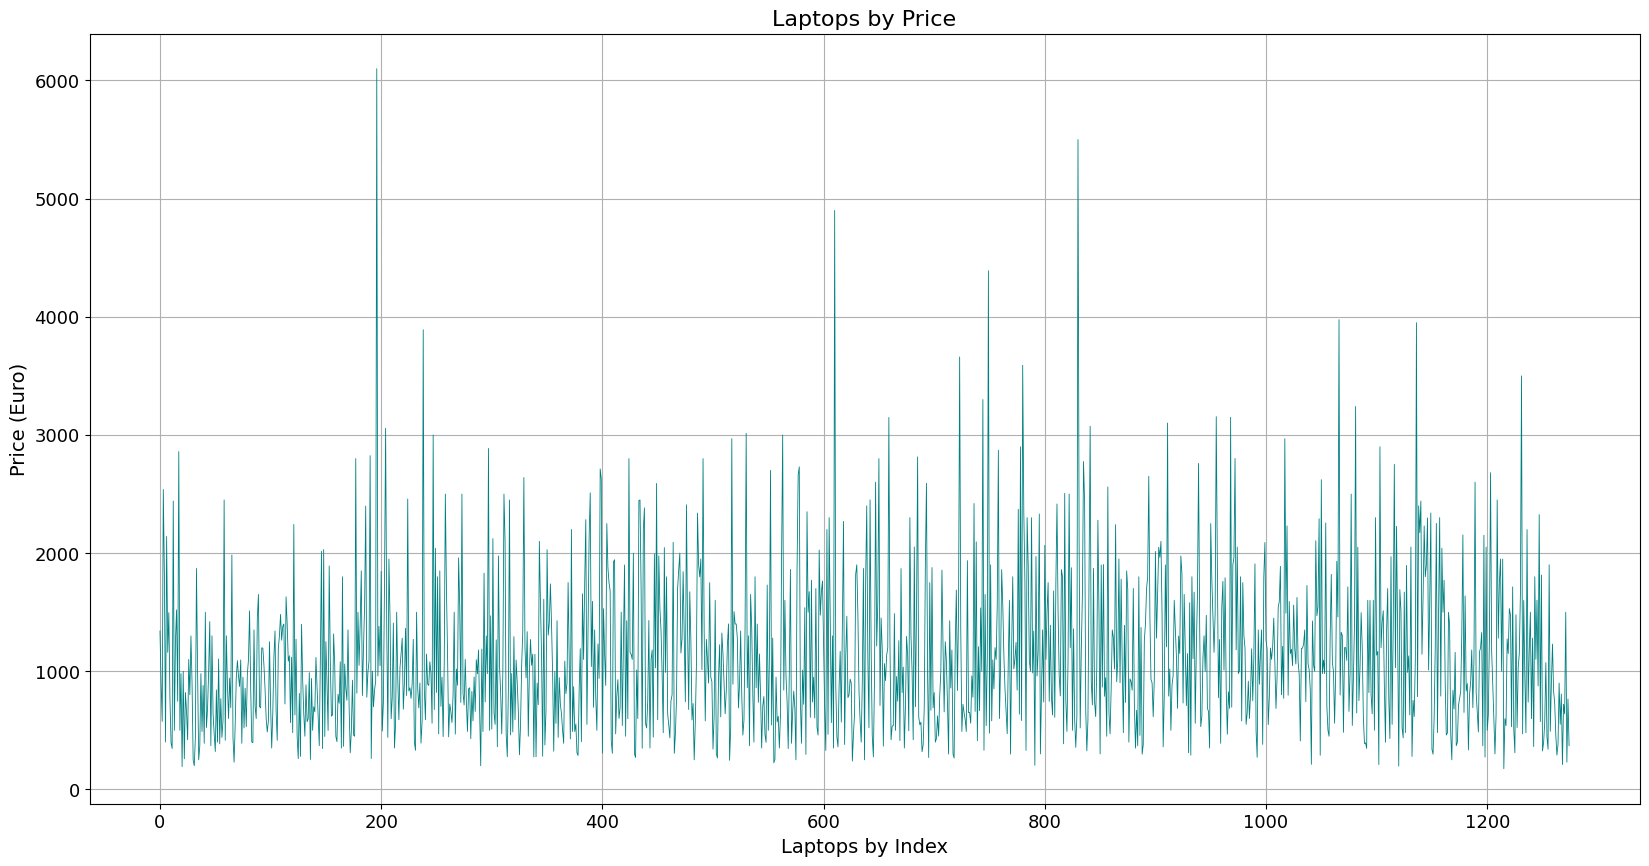

In [273]:
import pandas as pd
#importing the file 
df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")
import matplotlib.pyplot as plt
# creating the graph size
plt.figure(figsize=(20, 10))
# extracting the prices from the file and plotting the graph from the date inside. 
#I didn't need to send plot() the x axis since it take it automatically from the indexes of the file if not specified otherwise. 
plt.plot(df['Price (Euro)'], linestyle='-', linewidth= "0.6", color='teal')
#creating the name of the graph 
plt.title('Laptops by Price', fontsize=16)
#creating the x and y axis lables
plt.xlabel('Laptops by Index', fontsize=14)
plt.ylabel('Price (Euro)', fontsize=14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid(True)
#printing the graph, we can see in this graph that the y axis is the prices and in the x axis the laptops organized by the indexes. 
plt.show()

The average price by company in descending order:
 Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

The company with the highest aversage price is: Razer

The highest average Laptop price is: 3346.14 Euro


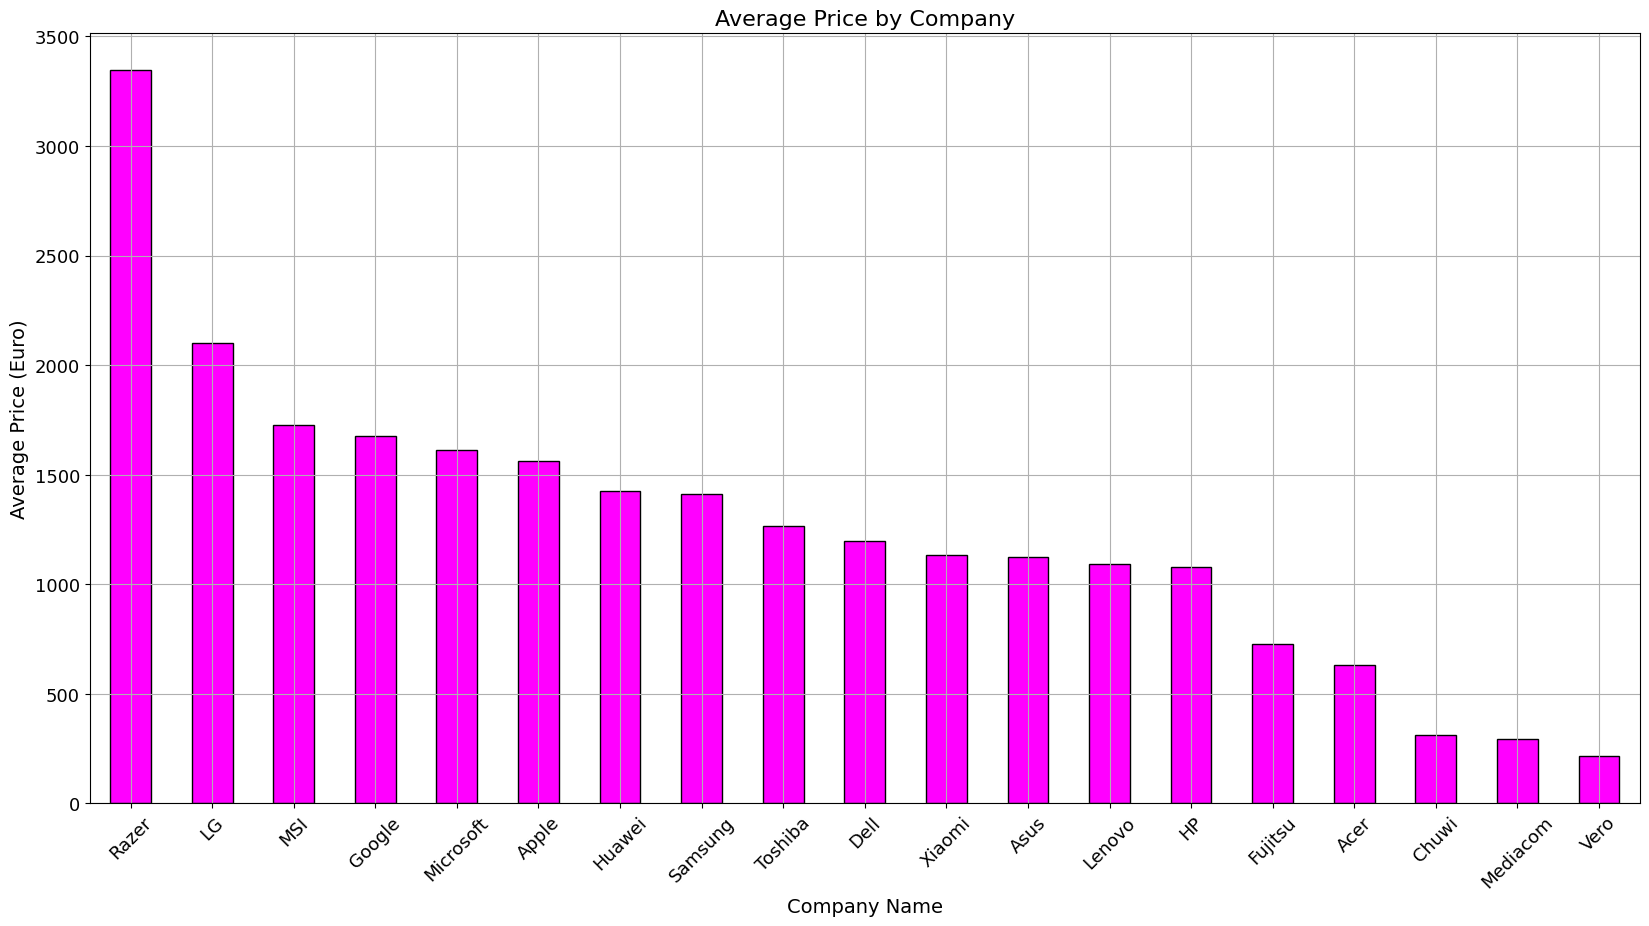

In [334]:
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
#importing the file 
df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")

# Group the DataFrame by the 'Company' column, calculate the mean price for each company,
# and sort the results in descending order of average price.
average_prices = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending= False)

# Print the average prices for each company in descending order
print("The average price by company in descending order:\n", average_prices)
# Identify the company with the highest average price  
# idxmax() returns the index, which in our case is the company name with the highest average price.
print("\nThe company with the highest aversage price is:", average_prices.idxmax())
# Print the highest average price rounded to two decimal places
print("\nThe highest average Laptop price is:", average_prices.round(2).max(), "Euro")

# Create a bar plot to visualize the average prices by company
plt.figure(figsize=(20,10))
average_prices.plot(kind='bar', color='magenta', edgecolor='black')
plt.title("Average Price by Company", fontsize= 16)
plt.xlabel("Company Name", fontsize= 14)
plt.ylabel("Average Price (Euro)", fontsize=14)
plt.xticks(rotation= 45, fontsize= 13)
plt.yticks(fontsize= 13)
plt.grid(True)
plt.show()



In [256]:
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
#importing the file 

df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")

def unify_os(name):

    # Normalize the OS name to lower case, and remove all white space characters 
    name = name.lower().strip()  

    # Mapping the different OS names into the 6 different options we got from the data.
    if 'windows' in name:
        return 'Windows'
    elif 'mac' in name:
        return 'MacOS'
    elif 'linux' in name:
        return 'Linux'
    elif 'no os' in name or 'none' in name:
        return 'NO os'
    elif 'chrome' in name:
        return 'Chrome OS'
    elif 'android' in name:
        return 'Android'
    else:
        return 'Other'
    
# Applying the function to the OPSYS column in our data base. 
df['OpSys'] = df['OpSys'].apply(unify_os)

# Saving a new variable that will keep a list where every OS name shows only once.  
unified_op_sys = df['OpSys'].unique().tolist()

# Printing the list
print("Unified Operating Systems:", unified_op_sys)




Unified Operating Systems: ['MacOS', 'NO os', 'Windows', 'Linux', 'Android', 'Chrome OS']


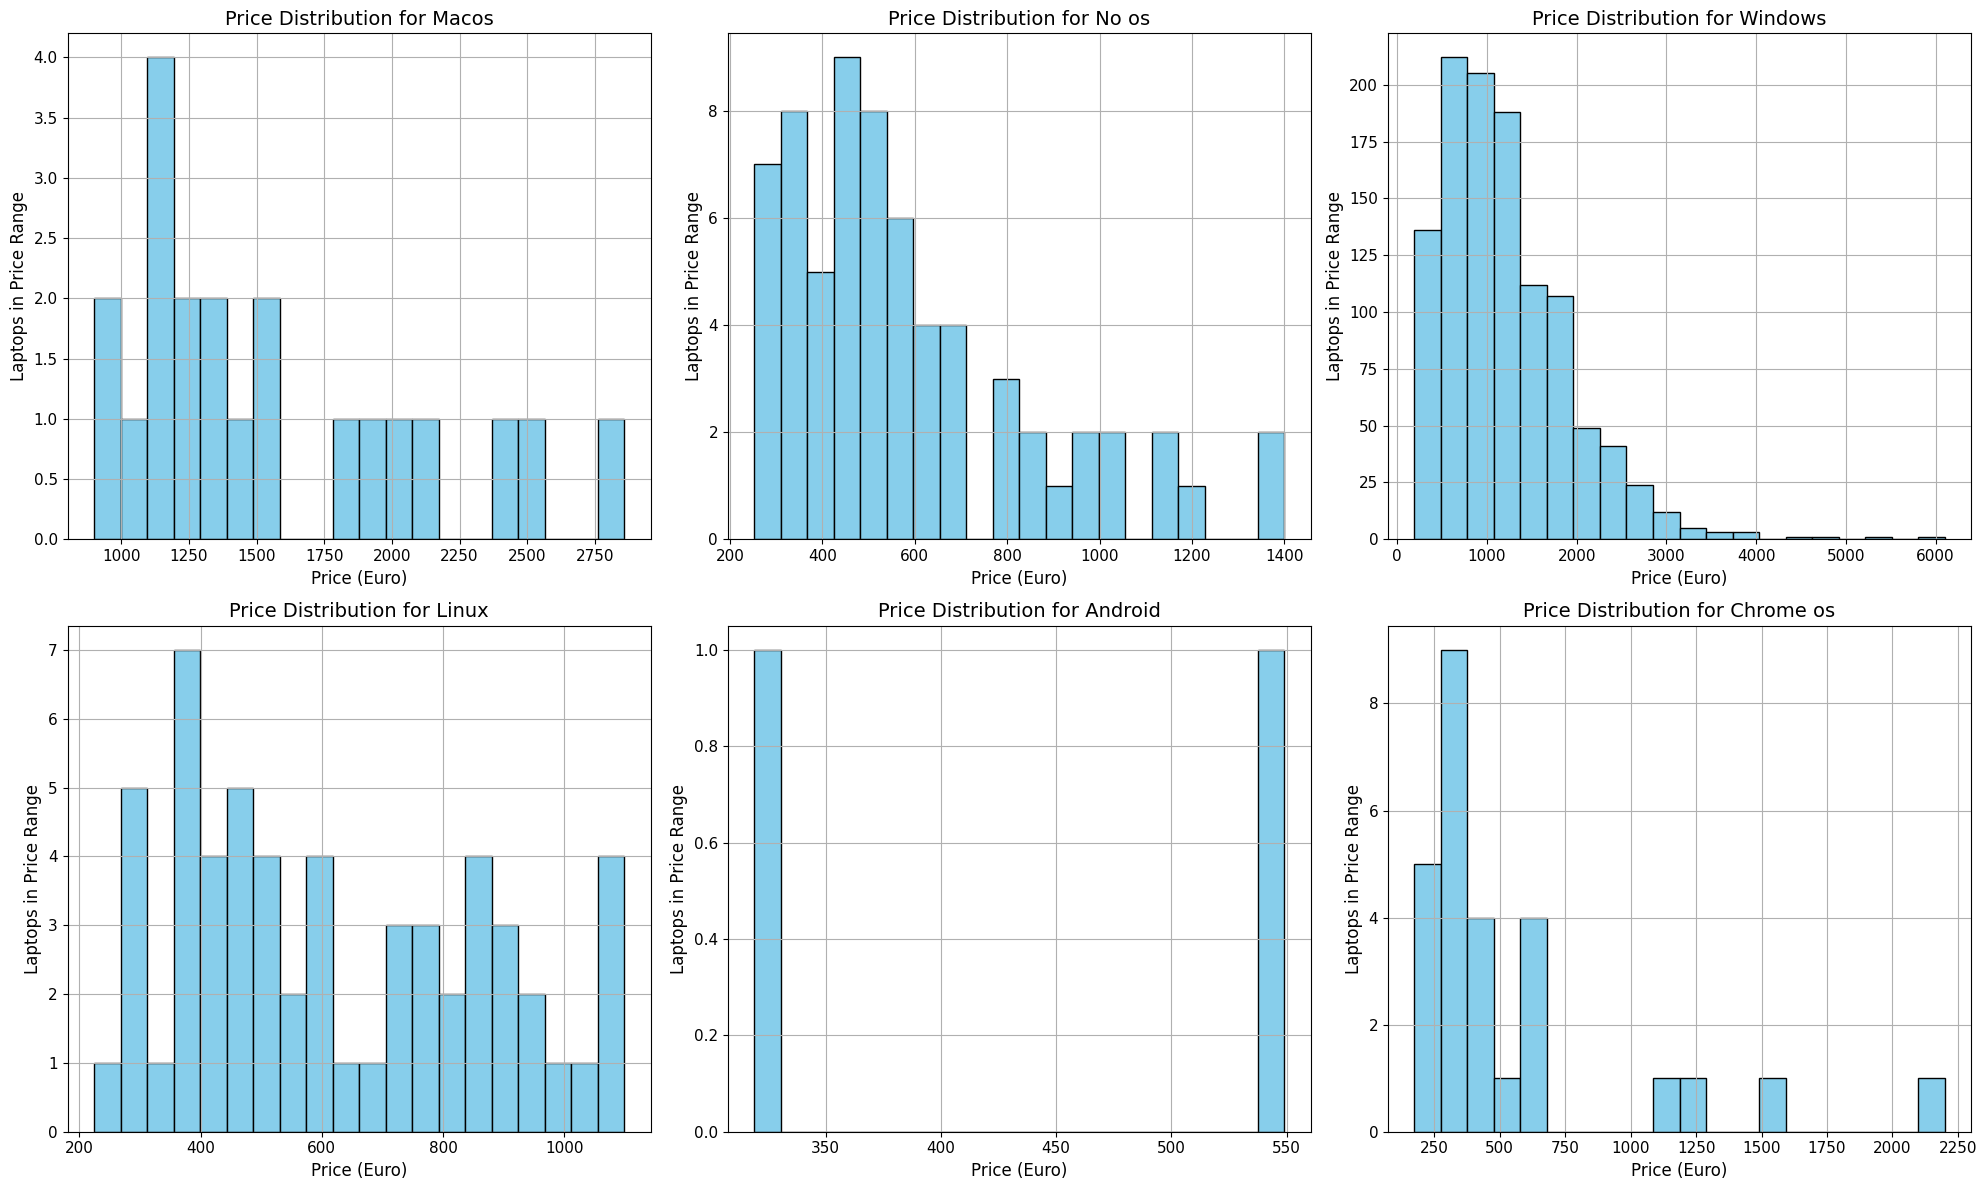

In [265]:
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
#importing the file 

df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")

#call the function from the previous part 
df['OpSys'] = df['OpSys'].apply(unify_os)
# saving only the unique opsystems and changing them to an iterable list
unified_op_sys = df['OpSys'].unique().tolist()

# Adjust the overall figure size
plt.figure(figsize=(20, 12))  
#indexing the different operating systems with 2 counters starting with the index of 1 
for i, os in enumerate(unified_op_sys, start=1):
    # Create subplots 
    plt.subplot(2, 3, i) 
    # Filter data for the current OS so only their rows will show
    subset = df[df['OpSys'] == os]  
    # Create a hist bar that has 20 different bins that divide the price range into 20 equal parts and caclculates
    # How many computers from that OS fall in each of the smaller price ranges. 
    plt.hist(subset['Price (Euro)'], bins=20, color='skyblue', edgecolor='black')
    #dynamic titles for each graph so it will contain the current OS we are looking at 
    plt.title(f'Price Distribution for {os.capitalize()}', fontsize=14)
    plt.xlabel('Price (Euro)', fontsize=12)
    plt.ylabel('Laptops in Price Range', fontsize=12)
    plt.yticks(fontsize = 11)
    plt.xticks(fontsize = 11)
    plt.grid(True)

# Spaces all of the graphs correctly so there will be no overlap
plt.tight_layout()
# Show all of the graphs at once 
plt.show()


The average price by RAM(GB) in descending order:
 RAM (GB)
64    3975.000000
32    3413.085882
24    2206.333333
16    1941.193081
12    1239.438400
8     1184.429413
6      619.356571
4      576.109101
2      247.634375
Name: Price (Euro), dtype: float64


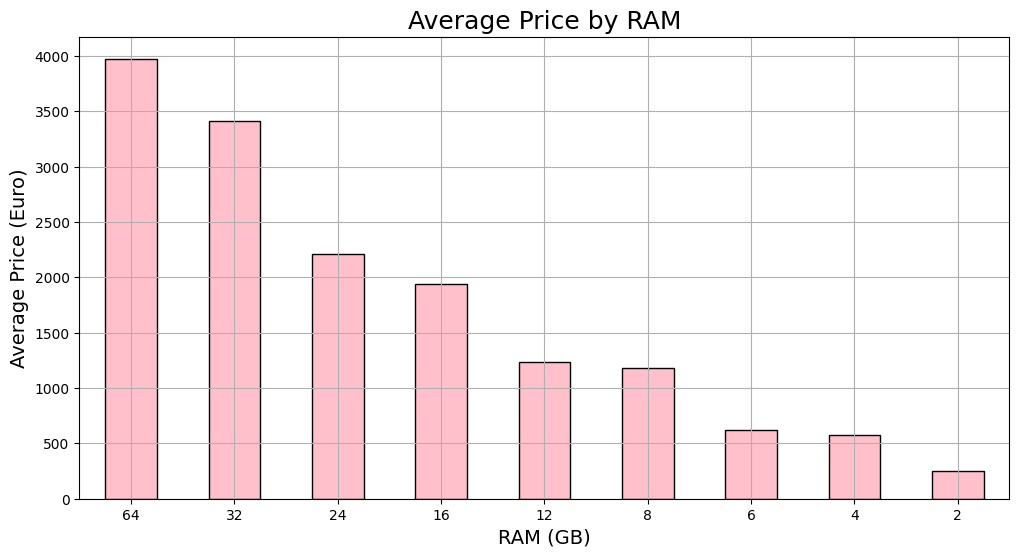

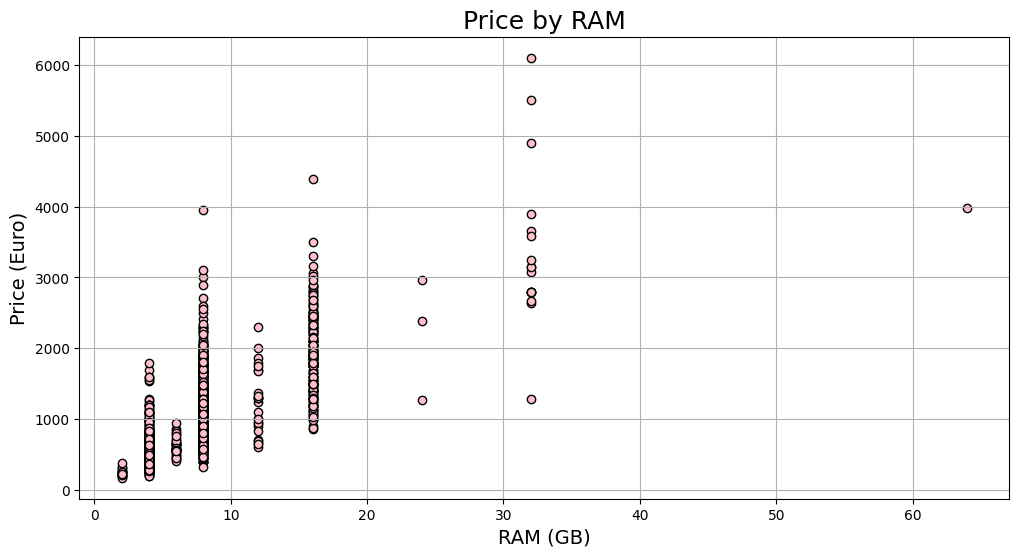

In [ ]:
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
#importing the file 

df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")

# Calculate the average laptop prices grouped by RAM size
# Group the DataFrame by the 'RAM (GB)' column, calculate the mean price for each RAM size,
# and sort the results in descending order of average price.
average_RAMprices = df.groupby('RAM (GB)')['Price (Euro)'].mean().sort_values(ascending= False)
# Print the average prices for each RAM size in descending order
print("The average price by RAM(GB) in descending order:\n", average_RAMprices)

# Create a bar plot to visualize the average prices by RAM size
plt.figure(figsize=(12,6))
average_RAMprices.plot(kind='bar', color='PINK', edgecolor='black')
# Add title and axis labels to the bar plot
plt.title("Average Price by RAM",fontsize = 18)
plt.xlabel("RAM (GB)", fontsize = 14)
plt.ylabel("Average Price (Euro)", fontsize = 14)
plt.xticks(rotation= 0)
plt.grid(True)
plt.show()


plt.figure(figsize=(12,6))
# Plot a scatter plot where each point represents a laptop's RAM size and its price, using pink points.
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], color='PINK', edgecolors= 'black')
plt.title("Price by RAM",fontsize = 18)
plt.xlabel("RAM (GB)", fontsize = 14)
plt.ylabel("Price (Euro)", fontsize = 14)
plt.xticks(rotation= 0)
plt.grid(True)
plt.show()

# We can see that on average for bigger RAM memory, the price of the laptop is higher.

In [329]:
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
#importing the file 

df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")
# Define a function to extract and categorize the memory type from the 'Memory' column
def MemoryType(memory):

    # Normalize the memory type name to lower case and remove all white spaces
    memory = memory.lower().strip()  
    # Check for specific keywords in the memory string and categorize accordingly, to these categories the new column 
    # Will be divided. 
   
    if 'ssd' in memory and 'hdd' in memory:
        return 'SSD + HDD'
    elif 'ssd' in memory and 'hybrid' in memory:
        return 'SSD + Hybrid'
    elif 'flash storage' in memory and 'hdd' in memory:
        return 'Flash Storage + HDD'
    elif 'ssd' in memory and '+' not in memory:
        return 'SSD'
    elif 'hdd' in memory and '+' not in memory:
        return 'HDD'
    elif 'flash storage' in memory:
        return 'Flash Storage'
    elif 'hybrid' in memory:
        return 'Hybrid'
    elif 'ssd' in memory and '+' in memory:
        return 'SSD + SSD'
    elif 'hdd' in memory and '+' in memory:
        return 'HDD + HDD'
    else:
        return 'Other'
    
# Apply the MemoryType function to the 'Memory' column to create a new column
newdf = df['Memory'].apply(MemoryType)

# Add the new 'Storage type' column to the DataFrame
df['Storage type']= newdf
# Display the first 40 rows of the updated DataFrame to verify the new column
types= newdf.unique().tolist()
print('The new column contains the values:\n', types, "\n")
df.head(40)



The new column contains the values:
 ['SSD', 'Flash Storage', 'HDD', 'SSD + HDD', 'SSD + SSD', 'Hybrid', 'Flash Storage + HDD', 'HDD + HDD', 'SSD + Hybrid'] 



,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.30,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.80,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.50,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.70,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.10,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,SSD
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD,A9-Series 9420,3.00,4,500GB HDD,AMD,Radeon R5,Windows 10,2.10,400.00,HDD
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.20,16,256GB Flash Storage,Intel,Iris Pro Graphics,Mac OS X,2.04,2139.97,Flash Storage
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.80,8,256GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,1158.70,Flash Storage
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel,Core i7 8550U,1.80,16,512GB SSD,Nvidia,GeForce MX150,Windows 10,1.30,1495.00,SSD
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel,Core i5 8250U,1.60,8,256GB SSD,Intel,UHD Graphics 620,Windows 10,1.60,770.00,SSD


In [ ]:
# Bonus question: 

# Here are 6 additional questions about the dataset that were not asked, which could expand the understanding of the dataset:

# 1. Which company produces the laptop with the lowest price?

# Analysis:
# Find the minimum price in the dataset using .min() and identify the corresponding company using .idxmin().
# Visualization:
# A bar chart displaying the lowest price for each company to show which company produces the cheapest laptops.


# 2. What is the distirbution of companies among different OS, which comany is the most popular
# In each OS?

# Analysis:
# Group the data by OpSys and Company, and count occurrences of each company for each OS using .groupby() and Values_Count().
# Visualization:
# 6 bar charts showing the count of laptops for each company across different operating systems.


# 3. What is the connection between CPU type and price 

# Analysis:
# Group data by CPU_Type and calculate the average price for each type using .groupby() and .mean().
# Visualization:
# A hist plot with CPU type on the x-axis and average price on the y-axis.


# 4. The relationship between the company and the laptop weight 

# Analysis:
# Group data by Company and calculate the average laptop weight for each company.
# Visualization:
# A bar chart showing the average weight of laptops by company.


# 5. The average laptop weight by RAM, does more RAM make the computer heavier on average?

# Analysis:
# Group data by RAM (GB) and calculate the average weight for each RAM category.
# Visualization:
# A bar chart showing the relationship between RAM and average laptop weight.


# 6. Is there a correlation between the product and screen resolution?

# Analysis:
# Extract ScreenResolution to calculate total resolution. Plot products against their total resolution.
# Visualization:
# A scatter plot with product names on the x-axis and total resolution on the y-axis.




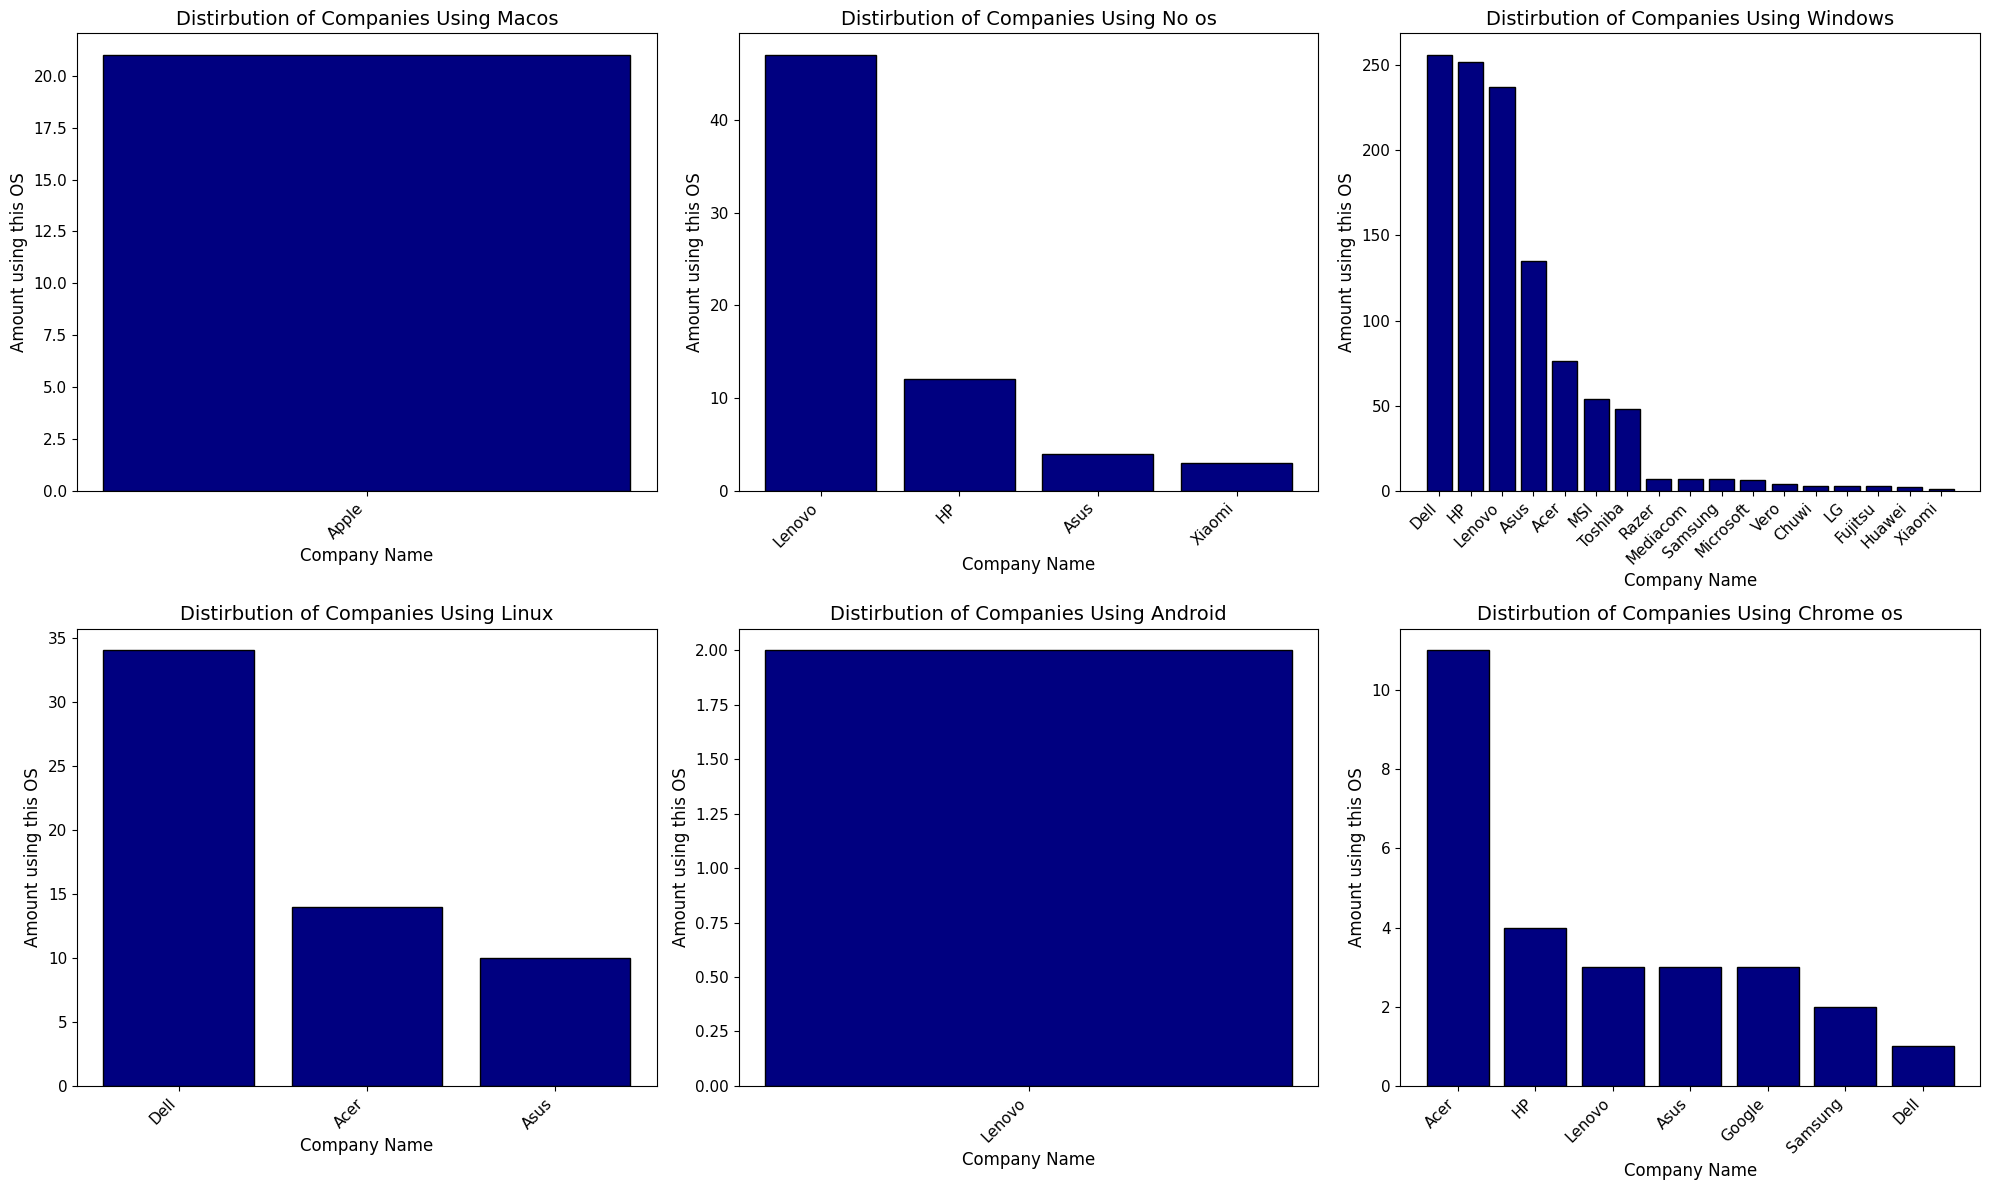

In [ ]:
# The implementation and visualization of the second question: 

import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
#importing the file 

df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")

df['OpSys'] = df['OpSys'].apply(unify_os)
unified_op_sys = df['OpSys'].unique().tolist()

plt.figure(figsize=(20, 12))  
#indexing the different operating systems with 2 counters starting with the index of 1 
for i, os in enumerate(unified_op_sys, start=1):
    # Create subplots 
    plt.subplot(2, 3, i) 
    # Filter data for the current OS so only the rows containing this OS will show
    subset = df[df['OpSys'] == os]  
    # Count occurrences for each company
    counts = subset['Company'].value_counts() 
    # Create a bar chart, with the companies names in the x axis (the indexes the function
    # value_counts() returns), and with the values it returns in the y axis.
    plt.bar(counts.index, counts.values, color='navy', edgecolor='black')
    # Dynamic titles for each graph so it will contain the current OS we are looking at 
    plt.title(f'Distirbution of Companies Using {os.capitalize()}', fontsize=14)
    # Labeling the X axis and th Y axis.
    plt.xlabel('Company Name', fontsize=12)
    plt.ylabel('Amount using this OS', fontsize=12)
    plt.yticks(fontsize = 11)
    # Printing the graphs in descending order. 
    plt.xticks(rotation= 45, fontsize = 11, ha='right')
# Spaces all of the graphs correctly so there will be no overlap
plt.tight_layout()
# Show all of the graphs at once 
plt.show()

'''
Analysis of the Results:

1. MacOS Distribution:
Key Insight: Only Apple uses macOS as the operating system in its products.
Explanation: This is expected since macOS is a proprietary OS exclusively developed and used by Apple.

2. No OS Distribution:
Key Insight: Lenovo dominates the laptops sold without any pre-installed OS, followed by HP, Asus, and Xiaomi.

3. Windows Distribution:
Key Insight: Dell, HP, and Lenovo dominate the market for laptops running Windows, followed closely by Asus and Acer.

4. Linux Distribution:
Key Insight: Dell leads in offering Linux laptops, followed by Acer and Asus.

5. Android Distribution:
Key Insight: Lenovo exclusively offers Android-based laptops.

6. Chrome OS Distribution:
Key Insight: Acer leads the Chrome OS market, followed by HP, Lenovo, and Asus, with minor contributions from Samsung and Google.
'''

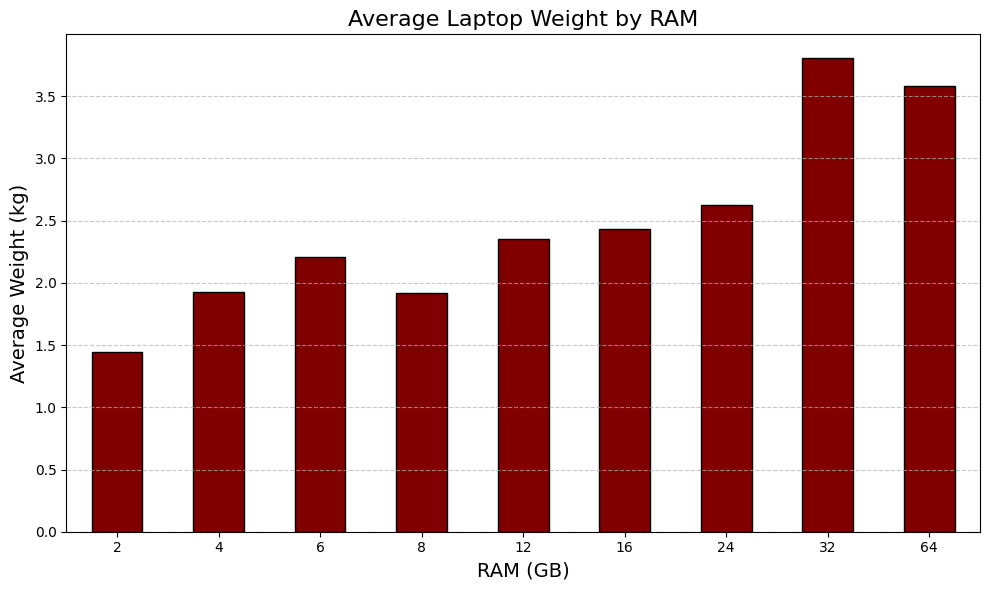

In [ ]:
# The implementation and visualization of the 6th question: 
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
#importing the file 
df = pd.read_csv("C:\\Users\\User\\Downloads\\laptop_price - dataset.csv")

# Group the DataFrame by the 'RAM' column, calculate the mean Weight for each RAM,
# Calculate the average weight by RAM
average_weight_by_ram = df.groupby("RAM (GB)")["Weight (kg)"].mean()

# Plot the average weight by RAM
plt.figure(figsize=(10, 6))
average_weight_by_ram.plot(kind="bar", color="maroon", edgecolor="black")
plt.title("Average Laptop Weight by RAM", fontsize=16)
plt.xlabel("RAM (GB)", fontsize=14)
plt.ylabel("Average Weight (kg)", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# As we can see, For bigger RAM memory, it doesn't necassirly mean the weight is heavier. 
